### Reading the market data of BAJAJFINSV stock and preparing a training dataset and validation dataset.

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('./RELIANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [6]:
df.set_index('Date',inplace=True)

#### Plotting the target variable VWAP over time

<AxesSubplot:xlabel='Date'>

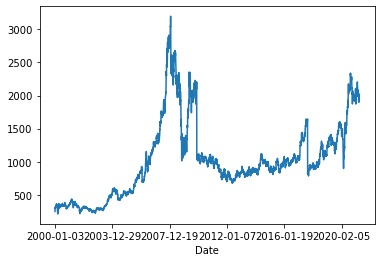

In [7]:
df['VWAP'].plot()

### so u can observe here some kind of Seasonality

### Data Pre-Processing

In [8]:
df.shape

(5306, 14)

In [9]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [12]:
df.shape

(2456, 14)

In [13]:
data=df.copy()

In [14]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [15]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [16]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [17]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [18]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [19]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,RELIANCE,EQ,951.85,952.00,958.65,943.65,947.5,946.80,947.83,1838452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,RELIANCE,EQ,946.80,936.55,954.70,936.55,952.5,951.05,947.09,2152963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,RELIANCE,EQ,951.05,960.50,967.00,931.50,936.0,934.60,951.69,4368279,...,6.279796,NaN,6.103756,NaN,1.378802e+06,NaN,1.316906e+14,NaN,39286.830291,NaN
2011-06-06,RELIANCE,EQ,934.60,934.65,940.80,928.15,938.6,937.75,935.29,1405741,...,13.108140,NaN,4.228573,NaN,1.540703e+06,NaN,1.477100e+14,NaN,44721.093193,NaN
2011-06-07,RELIANCE,EQ,937.75,933.55,960.00,933.55,959.6,958.25,950.55,4025919,...,13.565151,NaN,2.725955,NaN,1.620657e+06,NaN,1.554524e+14,NaN,42726.764294,NaN


In [20]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [21]:
data.shape

(2456, 34)

In [22]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [23]:
data.dropna(inplace=True)

In [24]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [25]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [26]:
training_data=data[0:1800]
test_data=data[1800:]

In [27]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,RELIANCE,EQ,949.20,947.50,957.85,947.00,954.60,954.00,953.65,2092020,...,2.026286,7.947057,7.051773,7.177669,9.730269e+05,1.148850e+06,9.210180e+13,1.097500e+14,17795.257524,28710.404696
2011-06-10,RELIANCE,EQ,954.00,955.10,956.00,932.05,946.00,944.50,942.51,2530136,...,1.082820,7.886086,7.899525,6.927026,5.830896e+05,1.087187e+06,5.491079e+13,1.039839e+14,18053.915374,28655.824909
2011-06-13,RELIANCE,EQ,944.50,943.25,943.25,921.00,924.60,925.60,926.27,2954066,...,7.949266,9.276019,13.048659,8.957200,4.310425e+05,1.045181e+06,3.707669e+13,1.000263e+14,22799.359881,28759.787990
2011-06-14,RELIANCE,EQ,925.60,925.30,931.75,910.00,911.45,911.35,915.92,4335560,...,12.130368,10.751157,11.025009,12.781423,9.440867e+05,1.037808e+06,8.331395e+13,9.593198e+13,5923.301360,22259.737281
2011-06-15,RELIANCE,EQ,911.35,912.00,918.90,898.60,900.25,900.55,906.48,4607486,...,12.181236,15.705875,11.200595,17.729952,8.865915e+05,9.499816e+05,7.790425e+13,8.445778e+13,22746.158188,26493.111072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,RELIANCE,EQ,1229.15,1235.15,1254.80,1229.00,1245.30,1241.95,1241.44,8838770,...,8.031812,29.899942,5.443115,29.590929,3.234384e+06,3.068510e+06,4.058476e+14,3.753736e+14,44610.740288,48004.426844
2018-09-05,RELIANCE,EQ,1241.95,1242.50,1252.65,1208.50,1226.00,1227.00,1230.06,10324923,...,2.639287,32.735926,11.082682,34.085308,1.684372e+06,2.297750e+06,2.096415e+14,2.789585e+14,6691.005380,36038.850957
2018-09-06,RELIANCE,EQ,1227.00,1230.15,1265.70,1225.35,1261.00,1261.40,1245.01,11195043,...,6.996845,28.039833,10.935378,28.797784,1.191482e+06,2.082259e+06,1.489314e+14,2.587592e+14,7521.329936,34188.546239


In [28]:
#pip install pmdarima

In [29]:
from pmdarima import auto_arima

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16434.483, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16438.932, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16433.015, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16432.812, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16437.031, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16434.635, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16434.623, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16434.765, Time=0.83 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16430.897, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16432.722, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16432.710, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16431.100, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=16432.870, Time=0.41 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.039 seconds


In [32]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
forecast=model.predict(n_periods=len(test_data), X=test_data[ind_features])
forecast

1800    1267.277676
1801    1258.663851
1802    1259.008822
1803    1248.563009
1804    1237.424841
           ...     
2445    1871.013636
2446    1897.365905
2447    1907.550544
2448    1924.672893
2449    1954.420474
Length: 650, dtype: float64

In [34]:
#test_data.reset_index(drop=True, inplace=True)
#test_data['Forecast_ARIMA'] = forecast
#forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['Forecast_ARIMA'])
#test_data = pd.concat([test_data, forecast_df], axis=1)
#test_data['Forecast_ARIMA']=forecast
#test_data['Forecast_ARIMA']
forecast
forecast_df = pd.DataFrame(forecast, columns=['Forecast_ARIMA'])
forecast_df

,Forecast_ARIMA
1800,1267.277676
1801,1258.663851
1802,1259.008822
1803,1248.563009
1804,1237.424841
...,...
2445,1871.013636
2446,1897.365905
2447,1907.550544
2448,1924.672893


In [35]:
forecast_df = pd.DataFrame(forecast, columns=['Forecast_ARIMA'])
#test_data = test_data.reset_index() # reset index to allow assignment by index
#test_data['Forecast_ARIMA'] = forecast_df['Forecast_ARIMA'] # assign values by index
#test_data = test_data.set_index('Date') # set index back to 'Date'
#test_data['Forecast_ARIMA']
#test_data.index.values
#forecast.index.values
#forecast_df['Date'] = test_data['Date']
forecast_df['Date'] = test_data.index

#forecast_df = forecast_df.reset_index()
forecast_df = forecast_df.set_index('Date')
forecast_df
#test_data['Forecast_ARIMA'] = forecast_df
merged_df = pd.merge(test_data, forecast_df, 'outer', on='Date' )
merged_df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,RELIANCE,EQ,1255.85,1259.00,1268.40,1234.25,1236.50,1237.70,1248.31,10874768,...,11.024405,10.650861,15.693887,2.152421e+06,1.703729e+06,2.695837e+14,2.096337e+14,21260.223360,22986.787594,1267.277676
2018-09-12,RELIANCE,EQ,1237.70,1251.80,1258.70,1228.85,1251.10,1252.50,1243.62,8065553,...,10.937501,11.044946,15.535918,1.977576e+06,1.595637e+06,2.431640e+14,1.987816e+14,8544.182660,21854.224565,1258.663851
2018-09-14,RELIANCE,EQ,1252.50,1259.40,1275.60,1247.65,1252.55,1253.15,1258.40,7878583,...,10.351277,9.679532,16.327482,1.678480e+06,1.707217e+06,2.080805e+14,2.112014e+14,8125.043754,21045.318564,1259.008822
2018-09-17,RELIANCE,EQ,1253.15,1250.75,1250.75,1221.60,1224.00,1225.90,1232.59,6754086,...,10.848683,13.444980,13.144037,7.093891e+05,1.919544e+06,9.529018e+13,2.428741e+14,6560.904739,20715.577025,1248.563009
2018-09-18,RELIANCE,EQ,1225.90,1226.00,1239.40,1214.35,1215.40,1217.15,1228.49,7616412,...,15.445022,17.512162,15.313284,5.883357e+05,1.677475e+06,8.063694e+13,2.166799e+14,7143.967408,13672.068491,1237.424841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,...,22.018474,17.414960,17.101984,2.138278e+06,1.449626e+06,4.267576e+14,2.862386e+14,43872.398111,36381.523158,1871.013636
2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,...,31.488522,21.667160,22.109425,2.297464e+06,1.468908e+06,4.654518e+14,2.972074e+14,61894.148393,43635.378340,1897.365905
2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,...,40.883192,34.602493,36.067262,9.003757e+05,1.445945e+06,1.562369e+14,2.941591e+14,22698.939740,42677.962457,1907.550544


<AxesSubplot:xlabel='Date'>

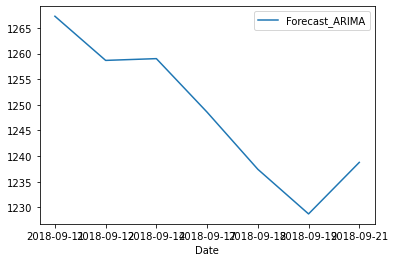

In [36]:
forecast_df.iloc[:7].plot()

<AxesSubplot:xlabel='Date'>

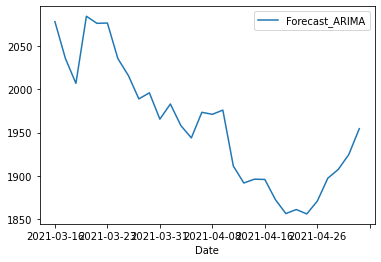

In [37]:
forecast_df.iloc[-30:].plot()   # Last 1 month price prediction

<AxesSubplot:xlabel='Date'>

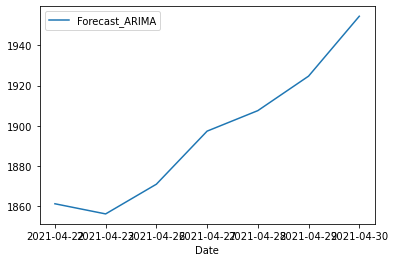

In [38]:
forecast_df.iloc[-7:].plot()

<AxesSubplot:xlabel='Date'>

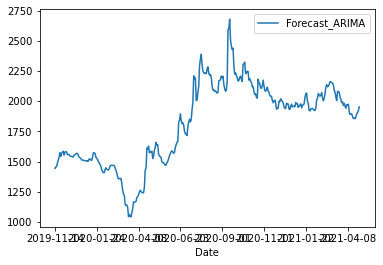

In [39]:
forecast_df.iloc[-365:].plot()

In [40]:
#test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

<AxesSubplot:xlabel='Date'>

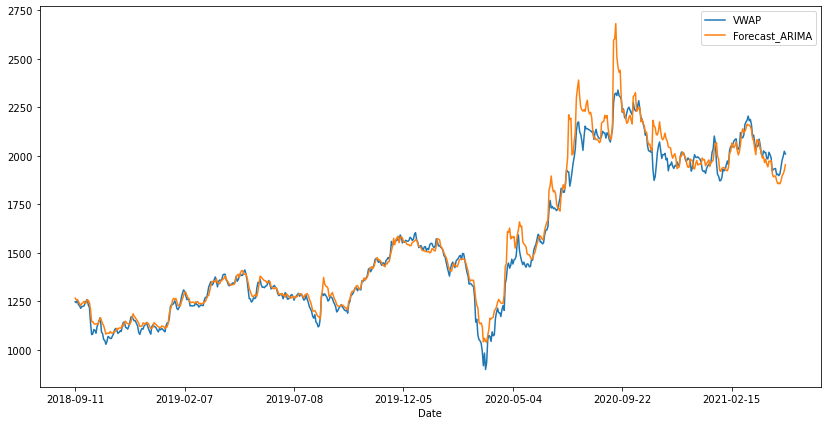

In [41]:
merged_df[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

<AxesSubplot:xlabel='Date'>

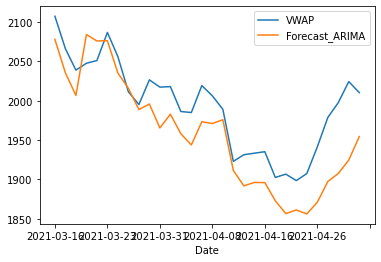

In [42]:
merged_df[['VWAP','Forecast_ARIMA']].iloc[-30:].plot()

#### The Auto ARIMA model seems to do a fairly good job in predicting the stock price

#### Checking Accuracy of our model

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
np.sqrt(mean_squared_error(merged_df['VWAP'],merged_df['Forecast_ARIMA']))

62.1287555605906

In [45]:
#np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

In [46]:
#mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

In [47]:
mean_absolute_error(merged_df['VWAP'],merged_df['Forecast_ARIMA'])

38.6107378389442